In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [80]:
class LinearRegression:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            
            y_predicted = np.dot(X, self.weights) + self.bias
        
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-y))
            db = (1/n_samples) * np.sum(y_predicted - y)
        
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
    

In [81]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

In [82]:
df = pd.read_csv("income.csv")

In [83]:
sc = StandardScaler()
X = sc.fit_transform(df[['year']])
#y = sc.fit_transform(df[['income']])
y = df['income']

In [84]:
#plt.figure(figsize=(8,6))
#plt.scatter(X, y, color='b', marker='o', s=20)
#plt.show()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 1)
(10, 1)
(37,)
(10,)


In [86]:
regressor = LinearRegression(lr = 0.01)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 23472211.46521177


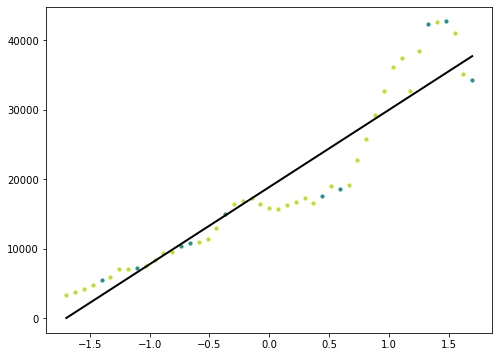

In [88]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()

In [89]:
regressor.predict(sc.transform([['2020']]))

array([40965.58393999])